# Load and Plot
## Load Libraries

In [1]:
# Base libraries
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tqdm import tqdm
from tqdm import tnrange
from scipy.special import erf
import pickle
import itertools

# Personal libraries
import sixtrackwrap as sx

from parameters import *

cmap = matplotlib.cm.get_cmap('plasma')

# Matplotlib Settings
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import matplotlib.ticker as ticker
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['savefig.dpi'] = 300

import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')
import os

import matplotlib.ticker as ticker


## Load Data
### Load Baseline

In [2]:
with open("data/DA_b.pkl", 'rb') as f:
    DA_b = pickle.load(f)
    
with open("data/error_b.pkl", 'rb') as f:
    error_b = pickle.load(f)

with open("data/DA_b_mc.pkl", 'rb') as f:
    DA_b_mc = pickle.load(f)
    
with open("data/error_b_mc.pkl", 'rb') as f:
    error_b_mc = pickle.load(f)

### Load Standard Integral

In [3]:
with open("data/DA_1.pkl", 'rb') as f:
    DA_1 = pickle.load(f)
    
with open("data/error_1.pkl", 'rb') as f:
    error_1 = pickle.load(f)

### Load Radial Average

In [4]:
with open("data/DA_2.pkl", 'rb') as f:
    DA_2 = pickle.load(f)
    
with open("data/error_2.pkl", 'rb') as f:
    error_2 = pickle.load(f)
    
with open("data/matrices_2.pkl", 'rb') as f:
    count_matrix, avg_matrix = pickle.load(f)
    
#with open("data/count_matrix_2.pkl", 'rb') as f:
#    count_matrix_2 = pickle.load(f)
    
#with open("data/avg_matrix_2.pkl", 'rb') as f:
#    average_matrix_2 = pickle.load(f)

### Load Monte Carlo

In [5]:
with open("data/DA_3.pkl", 'rb') as f:
    DA_3 = pickle.load(f)
    
with open("data/error_3.pkl", 'rb') as f:
    error_3 = pickle.load(f)

### Load Stratified Monte Carlo

In [6]:
with open("data/DA_4.pkl", 'rb') as f:
    DA_4 = pickle.load(f)

with open("data/error_4.pkl", 'rb') as f:
    error_4 = pickle.load(f)

### Load 2D Scanning

In [7]:
with open("data/DA_5.pkl", 'rb') as f:
    DA_5 = pickle.load(f)
    
with open("data/error_5.pkl", 'rb') as f:
    error_5 = pickle.load(f)

## Plot Stuff

### Resonance measure

/home/carlidel/Insync/carlo.montanari3@studio.unibo.it/OneDrive Biz/optimized_code/sixtrackwrap/sixtrackwrap/__init__.py:106: RuntimeWarning: invalid value encountered in true_divide
  matrices = np.nansum(matrices.reshape(


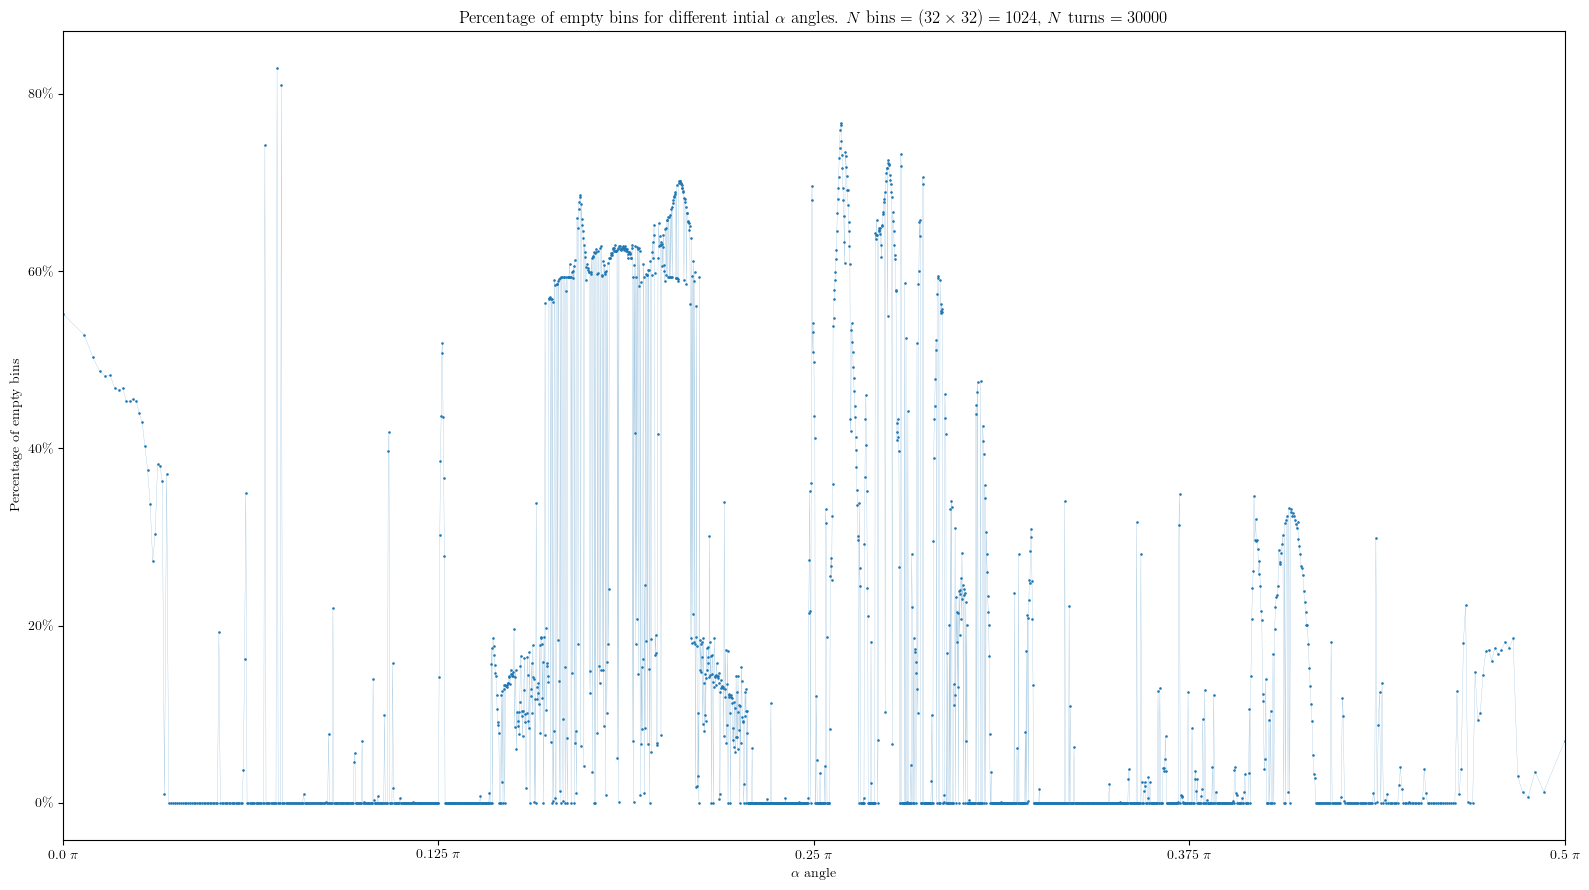

In [24]:
count_total, average_total, result_total, validity_total = sx.recursive_accumulation(count_matrix, avg_matrix)
alpha_preliminary_values = np.linspace(-1.0, 1.0, samples)
alpha_values = np.arccos(alpha_preliminary_values) / 2

nan_data = []

for j in range(0, len(count_total[2])):
    nan_data.append(np.count_nonzero(np.isnan(average_total[2][j])) / ((n_subdivisions / 4) ** 2))

nan_data = np.asarray(nan_data)
x = np.cos(alpha_values[::4]) * nan_data[::4]
y = np.sin(alpha_values[::4]) * nan_data[::4]
x = np.append(x, [0.0])
y = np.append(y, [0.0])

#plt.fill(x, y)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(alpha_values, nan_data, linewidth=0.2, c="C0", alpha=0.5)
ax.scatter(alpha_values, nan_data, s=0.75)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:2}".format(x/np.pi) + "$\\ \\pi$"))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi/8))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{}".format(int(x * 100)) + "$\\%$"))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.2))
ax.set_xlabel("$\\alpha$ angle")
ax.set_ylabel("Percentage of empty bins")
ax.set_title("Percentage of empty bins for different intial $\\alpha$ angles. $N$ bins $= ({}\\times{}) = {}$, $N$ turns $= {}$\n(Higher percentage implies less `diffusion')".format(n_subdivisions // 4, n_subdivisions // 4, (n_subdivisions // 4) ** 2, max_turns))
ax.set_xlim(0, np.pi/2)
plt.tight_layout()
plt.savefig("img/angle_resonance.jpg", dpi=600)

### Angles heatmap (Angular Average)

In [5]:
count_total, average_total, result_total, validity_total = sx.recursive_accumulation(count_matrix, avg_matrix)
alpha_preliminary_values = np.linspace(-1.0, 1.0, samples)
alpha_values = np.arccos(alpha_preliminary_values) / 2

for i in tqdm(range(len(count_total))):
    fig, axs = plt.subplots(1,2, figsize=(12,6))

    coso = axs[0].imshow(np.nanmean(average_total[i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))
    axs[0].set_title("Average radius measured\n$\\alpha$ samples $= {}$, $N$ iters $={}$".format(samples, max_turns))
    axs[0].set_xlabel("$\\theta_1$")
    axs[0].set_ylabel("$\\theta_2$")
    cb = fig.colorbar(coso, ax=axs[0])
    cb.ax.plot([0, 100], [DA_2[(samples, 'refined', 'mc')][0]]*2, 'w')
    
    axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[0].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
    axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[0].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

    coso = axs[1].imshow(np.nanmean(count_total[i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2), vmin=0)
    axs[1].set_title("Number of samples\n$\\alpha$ samples $= {}$, $N$ iters $={}$".format(samples, max_turns))
    axs[1].set_xlabel("$\\theta_1$")
    axs[1].set_ylabel("$\\theta_2$")
    fig.colorbar(coso, ax=axs[1])

    axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[1].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
    axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
    axs[1].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

    plt.tight_layout()
    # print(key)
    plt.savefig("img/cm_all_" + str(samples) + "_t_" + str(max_turns) + "_el_" + str(i) + ".jpg", dpi=300)
    plt.close()
    
    if i == 0 and False:
        for j in tqdm(range(0, len(count_total[i]), 128)):
            fig, axs = plt.subplots(1,2, figsize=(12,6))

            coso = axs[0].imshow(average_total[i][j], origin="lower", extent=(0, np.pi*2, 0, np.pi*2))
            axs[0].set_title("Average radius measured\n$\\alpha = {:.4f}$, $N$ iters $={}$".format(alpha_values[j], max_turns))
            axs[0].set_xlabel("$\\theta_1$")
            axs[0].set_ylabel("$\\theta_2$")
            cb = fig.colorbar(coso, ax=axs[0])
            cb.ax.plot([0, 100], [DA_2[(samples, 'refined', 'mc')][0]]*2, 'w')

            axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[0].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
            axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[0].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

            coso = axs[1].imshow(count_total[i][j], origin="lower", extent=(0, np.pi*2, 0, np.pi*2), vmin=0)
            axs[1].set_title("Number of samples\n$\\alpha = {:.4f}$, $N$ iters $={}$".format(alpha_values[j], max_turns))
            axs[1].set_xlabel("$\\theta_1$")
            axs[1].set_ylabel("$\\theta_2$")
            fig.colorbar(coso, ax=axs[1])

            axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[1].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
            axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
            axs[1].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

            plt.tight_layout()
            # print(key)
            plt.savefig("img/cm_a_" + "{:.4f}".format(alpha_values[j]) + "_t_" + str(max_turns) + "_el_" + str(i) + ".jpg", dpi=300)
            plt.close()

/home/carlidel/Insync/carlo.montanari3@studio.unibo.it/OneDrive Biz/optimized_code/sixtrackwrap/sixtrackwrap/__init__.py:106: RuntimeWarning: invalid value encountered in true_divide
  matrices = np.nansum(matrices.reshape(
100%|██████████| 8/8 [00:05<00:00,  1.55it/s]


In [34]:
import ffmpeg
import os

name = "movie.mp4"
if os.path.exists(name):
    os.remove(name)
    print("previous movie removed!")
(
    ffmpeg
    .input('img/cm_a_*.jpg', pattern_type='glob', framerate=4)
    .output(name, vcodec='libx265', crf=24)
    .run()
)

previous movie removed!


(None, None)

### Baseline

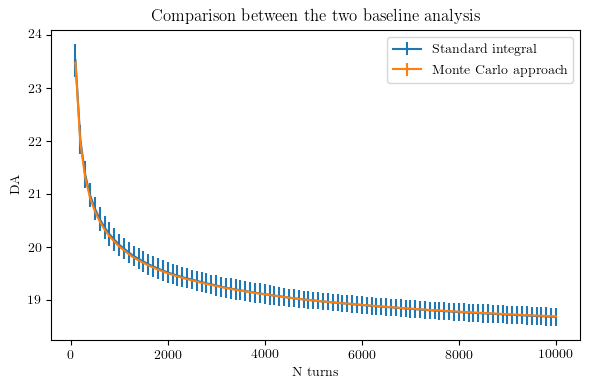

In [8]:
plt.figure()

plt.errorbar(turn_sampling, DA_b, yerr=error_b, label="Standard integral")
plt.errorbar(turn_sampling, DA_b_mc, yerr=error_b_mc, label="Monte Carlo approach")

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend()
plt.title("Comparison between the two baseline analysis")
plt.tight_layout()

plt.savefig("img/baseline.png", dpi=600)

### Standard Integral

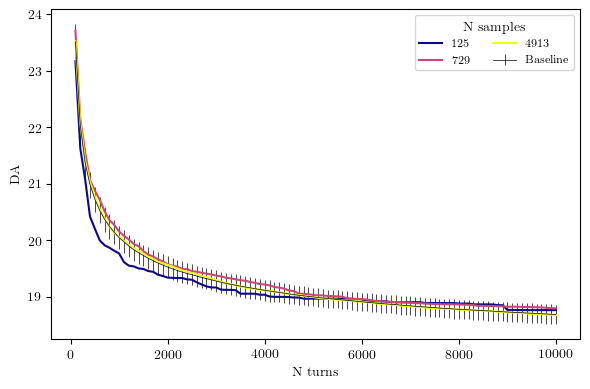

In [9]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")
elements = np.linspace(0,1,len(DA_1))
for i, label in enumerate(sorted(DA_1)):
    plt.plot(turn_sampling, DA_1[label], c=cmap(elements[i]), label=str(label))
#plt.title("Comparison with Standard Integral")
plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.tight_layout()

plt.savefig("img/standard_integral.png", dpi=600)
plt.savefig("img/standard_integral.pgf")

# plt.close()

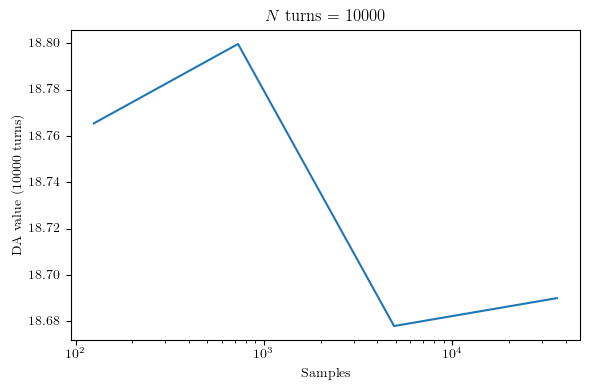

In [10]:
plt.figure()

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_1, key=lambda a: a)):
    data.append(DA_1[label][0])
    error.append(error_1[label][0])
    labels.append(label)

data.append(DA_b[0])
error.append(error_b[0])
labels.append(baseline_total_samples)

plt.plot(labels, data)

plt.title("$N$ turns $={}$".format(max_turns))
plt.xscale("log")
plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/standard_integral_single.png", dpi=600)
plt.savefig("img/standard_integral_single.pgf")

#plt.close()

### Radial Average

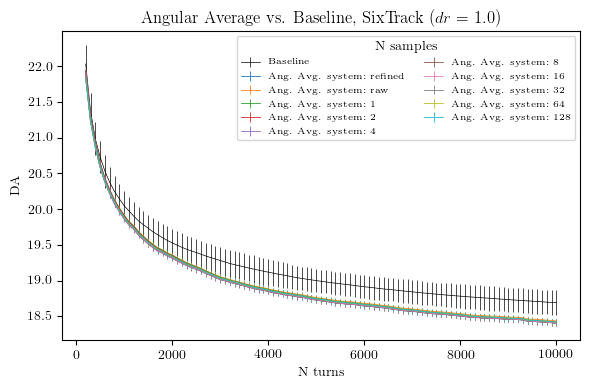

In [11]:
# Radial Average
skipper=-1
plt.figure()
plt.errorbar(turn_sampling[:skipper], DA_b[:skipper], yerr=error_b[:skipper], c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")

labels = filter(lambda f: f[0]==samples and f[2]=="mc", DA_2.keys())

for label in labels:
    plt.errorbar(turn_sampling[:skipper], DA_2[label][:skipper], yerr=error_2[label][:skipper], label="Ang. Avg. system: " + str(label[1]), linewidth=0.6, elinewidth=0.6)

#plt.title("Comparison with Angular Average")
plt.xlabel("N turns")
plt.ylabel("DA")
plt.legend(title="N samples", fontsize="x-small", ncol=2)
plt.title("Angular Average vs. Baseline, SixTrack $(dr = {})$".format(d_r))
plt.tight_layout()

plt.savefig("img/radial_average.png", dpi=600)
plt.savefig("img/radial_average.pgf")

In [12]:
plt.figure()

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_2, key=lambda a: a)):
    data.append(DA_2[label][0])
    error.append(error_2[label][0])
    labels.append(label)
    
plt.plot(labels, data)

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/radial_average_single.png", dpi=600)
plt.savefig("img/radial_average_single.pgf")

TypeError: '<' not supported between instances of 'int' and 'str'

<Figure size 600x400 with 0 Axes>

### Monte Carlo

In [ ]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline (35937 samples)")

label = sorted(DA_3)[-1]
plt.errorbar(turn_sampling, DA_3[label], yerr=error_3[label], label="Monte Carlo", linewidth=0.6, elinewidth=0.6)

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.title("Monte Carlo")
plt.tight_layout()

plt.savefig("img/monte_carlo.png", dpi=600)
plt.savefig("img/monte_carlo.pgf")

### Stratified Monte Carlo

In [ ]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline (35937 samples)")

label = sorted(DA_4)[-1]
plt.errorbar(turn_sampling, DA_4[label], yerr=error_4[label], label="Monte Carlo", linewidth=0.6, elinewidth=0.6)

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.tight_layout()

plt.savefig("img/stratified_monte_carlo.png", dpi=600)
plt.savefig("img/stratified_monte_carlo.pgf")

### Monte Carlo vs. Stratified

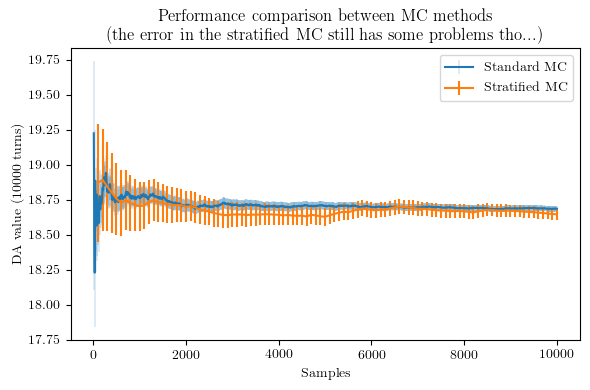

In [13]:
plt.figure()

data = []
error = []
labels = []

data_s = []
error_s = []
labels_s = []

for i, label in enumerate(sorted(DA_3, key=lambda a: a)):
    data.append(DA_3[label][0])
    error.append(error_3[label][0])
    labels.append(label)

for i, label in enumerate(sorted(DA_4, key=lambda a: a)):
    data_s.append(DA_4[label][0])
    error_s.append(error_4[label][0])
    labels_s.append(label)
    
plt.errorbar(labels, data, yerr=error, elinewidth=0.2, label="Standard MC")
plt.errorbar(labels_s, data_s, yerr=np.asarray(error_s)*0.05, elinewidth=1.5, label="Stratified MC")

plt.legend()
plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.title("Performance comparison between MC methods\n(the error in the stratified MC still has some problems tho...)")
plt.tight_layout()

plt.savefig("img/monte_carlo_single.png", dpi=600)
plt.savefig("img/monte_carlo_single.pgf")

### 2D Sampling

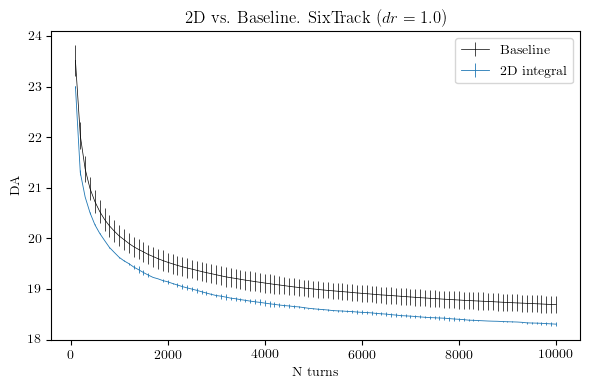

In [14]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")
elements = np.linspace(0,1,len(DA_5))

label = sorted(DA_5)[-1]
plt.errorbar(turn_sampling, DA_5[label], yerr=error_5[label], label="2D integral", linewidth=0.6, elinewidth=0.6)

#plt.title("Comparison with 2D integral")
plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend()
plt.title("2D vs. Baseline. SixTrack $(dr={})$".format(d_r))
plt.tight_layout()

plt.savefig("img/2d_integral.png", dpi=600)
plt.savefig("img/2d_integral.pgf")

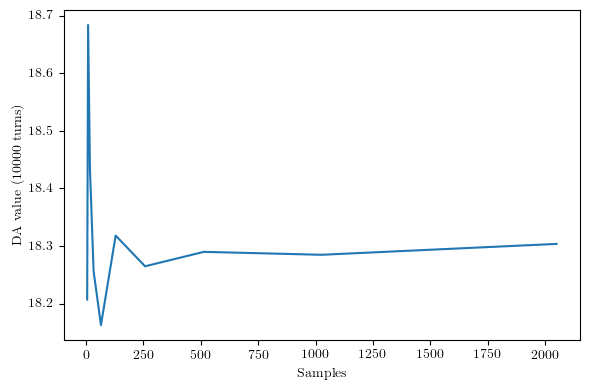

In [15]:
plt.figure()

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_5, key=lambda a: a[1])):
    data.append(DA_5[label][0])
    error.append(error_5[label][0])
    labels.append(label[0])
    
plt.plot(labels, data)

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/2d_single.png", dpi=600)
plt.savefig("img/2d_single.pgf")

### Maxi Contest

[5, 9, 17, 33, 65, 129, 257, 513, 1025, 2049] [18.397695340450763, 18.692375796385782, 18.62716413238619, 18.441606753185017, 18.282601464602593, 18.3722317308394, 18.373150513346044, 18.379864898229265, 18.38735913078828, 18.404029279255926]


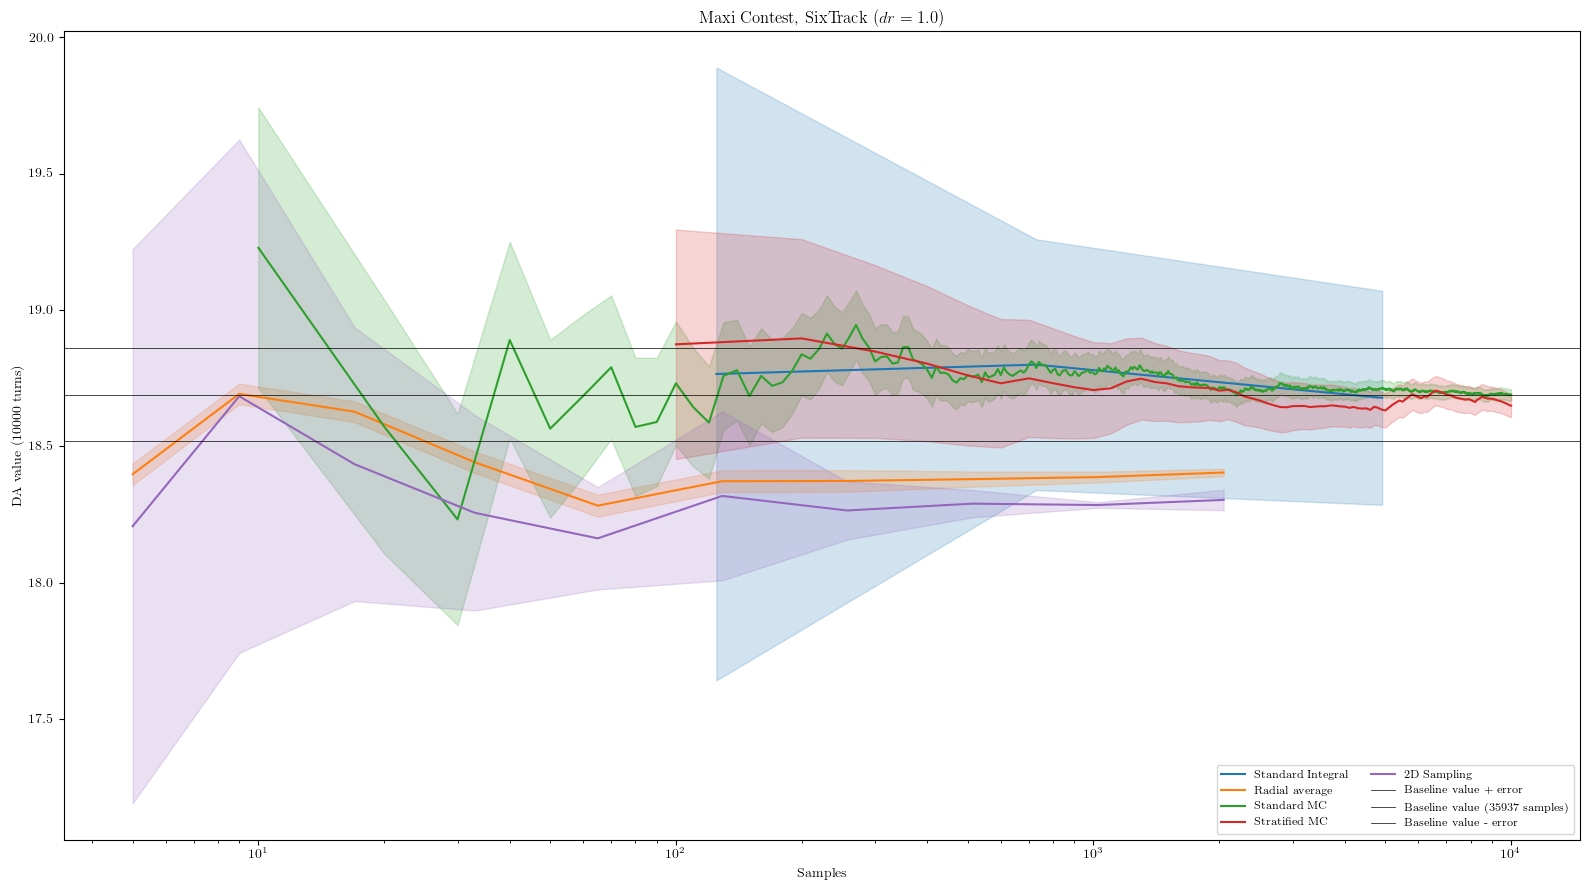

In [16]:
plt.figure(figsize=(16,9))

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_1, key=lambda a: a)):
    data.append(DA_1[label][0])
    error.append(error_1[label][0])
    labels.append(label)

plt.plot(labels, data, label="Standard Integral", c="C0")
plt.fill_between(labels, np.asarray(data) + np.asarray(error), np.asarray(data) - np.asarray(error), color="C0", alpha=0.2)
    
data = []
error = []
labels = []

for label in sorted(filter(lambda x: x[1] == "refined" and x[2] == "mc", DA_2.keys()), key=lambda a: a[0]):
    data.append(DA_2[label][0])
    error.append(error_2[label][0])
    labels.append(label[0])
print(labels, data)

plt.plot(labels, data, label="Radial average", c="C1")
plt.fill_between(labels, np.asarray(data) + np.asarray(error), np.asarray(data) - np.asarray(error), color="C1", alpha=0.2)
    
data = []
error = []
labels = []

data_s = []
error_s = []
labels_s = []

for i, label in enumerate(sorted(DA_3, key=lambda a: a)):
    data.append(DA_3[label][0])
    error.append(error_3[label][0])
    labels.append(label)

for i, label in enumerate(sorted(DA_4, key=lambda a: a)):
    data_s.append(DA_4[label][0])
    error_s.append(error_4[label][0])
    labels_s.append(label)
    
plt.plot(labels, data, label="Standard MC", c='C2')
plt.fill_between(labels, np.asarray(data) + np.asarray(error), np.asarray(data) - np.asarray(error), color="C2", alpha=0.2)

plt.plot(labels_s, data_s, label="Stratified MC", c='C3')
plt.fill_between(labels_s, np.asarray(data_s) + np.asarray(error_s) * 0.05, np.asarray(data_s) - np.asarray(error_s) * 0.05, color="C3", alpha=0.2)

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_5, key=lambda a: a)):
    data.append(DA_5[label][0])
    error.append(error_5[label][0])
    labels.append(label[0])
    
plt.plot(labels, data, label="2D Sampling", c='C4')
plt.fill_between(labels, np.asarray(data) + np.asarray(error), np.asarray(data) - np.asarray(error), color="C4", alpha=0.2)

plt.axhline(DA_b[0] + error_b[0], color="black", linewidth=0.5, label="Baseline value + error")
plt.axhline(DA_b[0], color="black", linewidth=0.5, label="Baseline value (35937 samples)")
plt.axhline(DA_b[0] - error_b[0], color="black", linewidth=0.5, label="Baseline value - error")
#plt.axhline(DA_b_mc[0], color="purple", linewidth=0.5, label="Baseline value (35937 samples)\n(MC approach)")

plt.legend(fontsize="small", ncol=2, loc="lower right")

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.title("Maxi Contest, SixTrack $(dr = {})$".format(d_r))
plt.tight_layout()

#plt.ylim(18.5, 18.9)

plt.xscale("log")

plt.savefig("img/mashup_single.png", dpi=300)
plt.savefig("img/mashup_single.pgf")

# Inspect Times
### Load

In [18]:
with open("data/time_1.pkl", 'rb') as f:
    time_engine_1, time_execution_1 = pickle.load(f)
    
with open("data/time_2.pkl", 'rb') as f:
    time_engine_2, time_execution_2 = pickle.load(f)
    
#with open("data/time_3.pkl", 'rb') as f:
#    time_engine_3, time_execution_3 = pickle.load(f)

time_engine_3 = 2465.95 # seconds

with open("data/time_4.pkl", 'rb') as f:
    time_engine_4 = pickle.load(f)

In [19]:
print("Part 1:", time_engine_1, time_execution_1)
print("Part 2:", time_engine_2, time_execution_2)
print("Part 3:", time_engine_3)
print("Part 4:", time_engine_4)

Part 1: 13916.710099220276 1.6271727085113525
Part 2: 683.7082920074463 16705.10738658905
Part 3: 2465.95
Part 4: 29804.58199095726


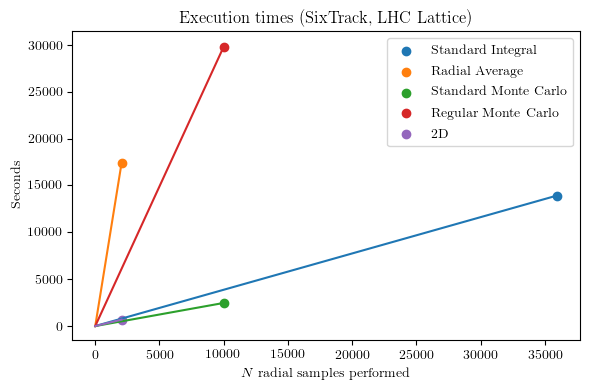

In [26]:
plt.scatter([baseline_total_samples], [time_engine_1 + time_execution_1], c='C0', label="Standard Integral")
plt.plot([0.0, baseline_total_samples], [0.0, time_engine_1 + time_execution_1], c='C0')

plt.scatter([samples], [time_engine_2 + time_execution_2], c='C1', label="Radial Average")
plt.plot([0.0, samples], [0.0, time_engine_2 + time_execution_2], c='C1')

plt.scatter([mc_max_samples], [time_engine_3], c='C2', label="Standard Monte Carlo")
plt.plot([0.0, mc_max_samples], [0.0, time_engine_3], c='C2')

plt.scatter([mcs_max_samples], [time_engine_4], c='C3', label="Regular Monte Carlo")
plt.plot([0.0, mcs_max_samples], [0.0, time_engine_4], c='C3')

plt.scatter([samples], [time_engine_2], c='C4', label="2D")
plt.plot([0.0, samples], [0.0, time_engine_2], c='C4')

plt.legend()
plt.xlabel("$N$ radial samples performed")
plt.ylabel("Seconds")
plt.title("Execution times (SixTrack, LHC Lattice)")

plt.tight_layout()
plt.savefig("img/execution_times.jpg", dpi=600)
